In [1]:
import sys
import geoopt
import torch
import numpy as np
import pytest

import matplotlib.pyplot as plt

Use `geoopt` to do line search optimization where parameters are constrained to manifolds. 

As example we will try to find the basis of a matrix $A$ in which it has the smallest 1-norm by minimizing $\|XAY\|_1$ where $X,Y$ are orthogonal

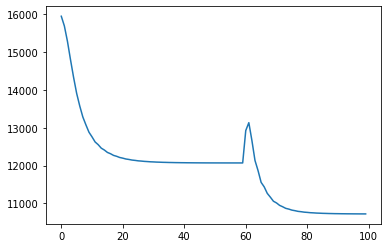

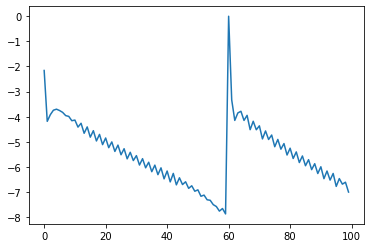

In [3]:
(n,m) = (100,200)
A = torch.randn(n,m)
stiefel = geoopt.manifolds.Stiefel()
X = stiefel.random((n,n))
X.requires_grad=True
Y = stiefel.random((m,m))
Y.requires_grad=True

def closure():
    optim.zero_grad()

    loss = (X@A@Y).norm(p=1)
    loss.backward()

    return loss.item()

optim = geoopt.optim.RiemannianLineSearch([X,Y])
losses = []
losses2 = []
for i in range(100):
    losses.append(optim.step(closure))


plt.plot(losses)
plt.figure()
log_step_sizes = (np.log10([x if (x is not None) else 1 for x in optim.step_size_history]))
plt.plot(log_step_sizes)
plt.show()